# Credit EDA Assignment

# Introduction

This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# Business Objective

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

# Importing the libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import jovian

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and loading the data

In [6]:
ad=pd.read_csv("application_data.csv")
ad.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
pa=pd.read_csv("previous_application.csv")


In [8]:
cd=pd.read_csv("columns_description.csv",encoding="ISO-8859–1")

# Handling the missing Data , Cleaning the data and removing unrequired columns

In [9]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
ad.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

-- Dropping those coulmns which have more than 40 % missing values in them as if we try to fill those columns, our data -analysis and data visualisation might not come out correct

In [11]:
pd.set_option("display.max_rows",100)

In [12]:
temp=ad.isnull().mean().reset_index().rename(columns={"index":"column",0:"Missing"}).sort_values(by='Missing',ascending=False)
temp

,column,Missing
76,COMMONAREA_MEDI,0.698723
48,COMMONAREA_AVG,0.698723
62,COMMONAREA_MODE,0.698723
70,NONLIVINGAPARTMENTS_MODE,0.694330
56,NONLIVINGAPARTMENTS_AVG,0.694330
...,...,...
15,NAME_HOUSING_TYPE,0.000000
14,NAME_FAMILY_STATUS,0.000000
13,NAME_EDUCATION_TYPE,0.000000
12,NAME_INCOME_TYPE,0.000000


In [13]:
drop_cols=list(temp[temp['Missing']>0.4]['column'])

In [14]:
ad.drop(drop_cols,axis=1,inplace=True)

In [15]:
ad.shape

(307511, 73)

In [16]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [17]:
ad.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [18]:
ad['AMT_ANNUITY'].isnull().sum()

12

In [19]:
float(100*(12/307511))

0.003902299429939092

In [20]:
ad['AMT_ANNUITY'].shape

(307511,)

-- As the null value is extremely low (0.3 %) we can afford to drop the values

In [21]:
ad=ad[~ad['AMT_ANNUITY'].isnull()]

In [22]:
ad.shape

(307499, 73)

In [23]:
ad['AMT_GOODS_PRICE'].isnull().sum()

278

In [24]:
ad['AMT_GOODS_PRICE'].shape

(307499,)

In [25]:
float(100*(278/307499))

0.09040679807088804

-- We have 9 % missing values in this column so we try to find the mean and median to replace it

In [26]:
ad['AMT_GOODS_PRICE'].median()

450000.0

In [27]:
ad['AMT_GOODS_PRICE']=ad['AMT_GOODS_PRICE'].fillna(ad['AMT_GOODS_PRICE'].median())

-- This is a categorical column and hence the missing values will be replaced by the mode

In [28]:
ad['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
dtype: object

In [29]:
ad['NAME_TYPE_SUITE'].isnull().sum()

1292

In [30]:
ad['NAME_TYPE_SUITE']=ad['NAME_TYPE_SUITE'].fillna(ad['NAME_TYPE_SUITE'].mode()[0])

-- As OCCUPATION_TYPE column is a categorical column and the missing value percentage is 31.34% we will replace it by mode

In [31]:
ad['OCCUPATION_TYPE'].isnull().sum()

96391

In [32]:
float(100*(96391/307499))

31.346768607377584

In [33]:
ad['OCCUPATION_TYPE']=ad['OCCUPATION_TYPE'].fillna(ad['OCCUPATION_TYPE'].mode()[0])

In [34]:
ad.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

-- Removing the missing values with median as it is better than mean in the current column

In [35]:
ad['CNT_FAM_MEMBERS'].isnull().sum()

2

In [36]:
ad['CNT_FAM_MEMBERS'].median()

2.0

In [37]:
ad['CNT_FAM_MEMBERS']=ad['CNT_FAM_MEMBERS'].fillna(ad['CNT_FAM_MEMBERS'].median())

In [38]:
ad['CNT_FAM_MEMBERS'].isnull().sum()

0

-- Filling the Missing value with the meadian

In [39]:
ad['EXT_SOURCE_2'].isnull().sum()

660

In [40]:
float(100*(660/307499))

0.21463484434095723

In [41]:
ad['EXT_SOURCE_2'].median()

0.5659560543013878

In [42]:
ad['EXT_SOURCE_2']=ad['EXT_SOURCE_2'].fillna(ad['EXT_SOURCE_2'].median())

In [43]:
ad['EXT_SOURCE_2'].isnull().sum()

0

In [44]:
ad.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [45]:
ad['EXT_SOURCE_3'].isnull().sum()

60964

In [46]:
ad.shape

(307499, 73)

In [47]:
float(100*(60694/307499))

19.73795036731827

In [48]:
ad['EXT_SOURCE_3'].median()

0.5352762504724826

In [49]:
ad['EXT_SOURCE_3']=ad['EXT_SOURCE_3'].fillna(ad['EXT_SOURCE_3'].median())

In [50]:
ad['EXT_SOURCE_3'].isnull().sum()

0

In [51]:
ad.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

-- Dropped some columns as there were large number of missing value and were unnecessary to our analysis


In [52]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307499 non-null  int64  
 1   TARGET                       307499 non-null  int64  
 2   NAME_CONTRACT_TYPE           307499 non-null  object 
 3   CODE_GENDER                  307499 non-null  object 
 4   FLAG_OWN_CAR                 307499 non-null  object 
 5   FLAG_OWN_REALTY              307499 non-null  object 
 6   CNT_CHILDREN                 307499 non-null  int64  
 7   AMT_INCOME_TOTAL             307499 non-null  float64
 8   AMT_CREDIT                   307499 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307499 non-null  float64
 11  NAME_TYPE_SUITE              307499 non-null  object 
 12  NAME_INCOME_TYPE             307499 non-null  object 
 13 

In [53]:
ad.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [54]:
ad['DAYS_LAST_PHONE_CHANGE'].median()

-757.0

In [55]:
ad['DAYS_LAST_PHONE_CHANGE']=ad['DAYS_LAST_PHONE_CHANGE'].fillna(ad['DAYS_LAST_PHONE_CHANGE'].median())

In [56]:
ad['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [57]:
ad.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [58]:
ad['AMT_REQ_CREDIT_BUREAU_YEAR'].median()

1.0

In [59]:
ad['AMT_REQ_CREDIT_BUREAU_YEAR']=ad['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(ad['AMT_REQ_CREDIT_BUREAU_YEAR'].median())

In [60]:
ad['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

In [61]:
ad['AMT_REQ_CREDIT_BUREAU_QRT']=ad['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(ad['AMT_REQ_CREDIT_BUREAU_QRT'].median())

In [62]:
ad['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [63]:
ad['AMT_REQ_CREDIT_BUREAU_MON']=ad['AMT_REQ_CREDIT_BUREAU_MON'].fillna(ad['AMT_REQ_CREDIT_BUREAU_MON'].median())

In [64]:
ad['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

In [65]:
ad['AMT_REQ_CREDIT_BUREAU_WEEK']=ad['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(ad['AMT_REQ_CREDIT_BUREAU_WEEK'].median())

In [66]:
ad['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

In [67]:
ad['AMT_REQ_CREDIT_BUREAU_DAY']=ad['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(ad['AMT_REQ_CREDIT_BUREAU_DAY'].median())

In [68]:
ad['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

In [69]:
ad['AMT_REQ_CREDIT_BUREAU_HOUR']=ad['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(ad['AMT_REQ_CREDIT_BUREAU_HOUR'].median())

In [70]:
ad['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [71]:
ad.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE             

In [72]:
ad['OBS_30_CNT_SOCIAL_CIRCLE'].median()

0.0

In [73]:
ad['OBS_30_CNT_SOCIAL_CIRCLE']=ad['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(ad['OBS_30_CNT_SOCIAL_CIRCLE'].median())

In [74]:
ad['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [75]:
ad['DEF_30_CNT_SOCIAL_CIRCLE'].median()

0.0

In [76]:
ad['DEF_30_CNT_SOCIAL_CIRCLE']=ad['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(ad['DEF_30_CNT_SOCIAL_CIRCLE'].median())

In [77]:
ad['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [78]:
ad['OBS_60_CNT_SOCIAL_CIRCLE'].median()

0.0

In [79]:
ad['OBS_60_CNT_SOCIAL_CIRCLE']=ad['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(ad['OBS_60_CNT_SOCIAL_CIRCLE'].median())

In [80]:
ad['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [81]:
ad['DEF_60_CNT_SOCIAL_CIRCLE'].median()

0.0

In [82]:
ad['DEF_60_CNT_SOCIAL_CIRCLE']=ad['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(ad['DEF_60_CNT_SOCIAL_CIRCLE'].median())

In [83]:
ad['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [84]:
ad.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

-- After cleaning the application data now we will clean the previous_application(pa)

In [85]:
pa.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [86]:
pa['AMT_ANNUITY'].isnull().sum()

372235

In [87]:
pa['AMT_ANNUITY'].shape

(1670214,)

In [88]:
float(100*(372235/1670214))

22.286665062081866

In [89]:
pd.set_option("display.max_rows",100)

In [90]:
temp1=pa.isnull().mean().reset_index().rename(columns={"index":"column",0:"Missing"}).sort_values(by="Missing",ascending=False)
temp1

,column,Missing
14,RATE_INTEREST_PRIVILEGED,9.964370e-01
13,RATE_INTEREST_PRIMARY,9.964370e-01
6,AMT_DOWN_PAYMENT,5.363648e-01
12,RATE_DOWN_PAYMENT,5.363648e-01
20,NAME_TYPE_SUITE,4.911975e-01
36,NFLAG_INSURED_ON_APPROVAL,4.029813e-01
35,DAYS_TERMINATION,4.029813e-01
34,DAYS_LAST_DUE,4.029813e-01
33,DAYS_LAST_DUE_1ST_VERSION,4.029813e-01
32,DAYS_FIRST_DUE,4.029813e-01


In [91]:
drop_cols_pa=list(temp1[temp1["Missing"]>0.4]["column"])
drop_cols_pa

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [92]:
pa.drop(drop_cols_pa,axis=1,inplace=True)

In [93]:
pa.shape

(1670214, 26)

In [94]:
pa.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [95]:
pa['AMT_ANNUITY'].median()

11250.0

In [96]:
pa['AMT_ANNUITY']=pa['AMT_ANNUITY'].fillna(pa['AMT_ANNUITY'].median())

In [97]:
pa['AMT_ANNUITY'].isnull().sum()

0

In [98]:
pa=pa[~pa['AMT_CREDIT'].isnull()]

In [99]:
pa['AMT_CREDIT'].isnull().sum()

0

In [100]:
pa['AMT_GOODS_PRICE'].median()

112320.0

In [101]:
pa['AMT_GOODS_PRICE']=pa['AMT_GOODS_PRICE'].fillna(pa['AMT_GOODS_PRICE'].median())

In [102]:
pa['AMT_GOODS_PRICE'].isnull().sum()

0

In [103]:
pa['CNT_PAYMENT'].median()

12.0

In [104]:
pa['CNT_PAYMENT']=pa['CNT_PAYMENT'].fillna(pa['CNT_PAYMENT'].median())

In [105]:
pa['CNT_PAYMENT'].isnull().sum()

0

In [106]:
pa=pa[~pa['PRODUCT_COMBINATION'].isnull()]

In [107]:
pa['PRODUCT_COMBINATION'].isnull().sum()

0

In [108]:
pa.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [109]:
cd.isnull().sum()

Unnamed: 0      0
Table           0
Row             0
Description     0
Special        91
dtype: int64

In [110]:
cd['Special'].isnull().sum()

91

In [111]:
cd['Special']=cd['Special'].fillna(cd['Special'].mode()[0])

In [112]:
cd.isnull().sum()

Unnamed: 0     0
Table          0
Row            0
Description    0
Special        0
dtype: int64

-- The Missing values has been fixed and now we will check for outliers and fix them 

# Univariate Analysis

-- we will not find any outliers for column description (as it only defines the column)

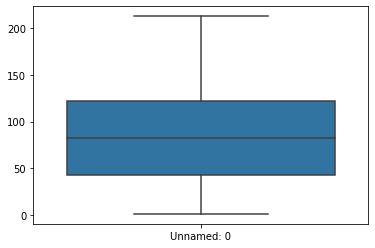

In [113]:
sns.boxplot(data=cd)
plt.show()

In [114]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307499 non-null  int64  
 1   TARGET                       307499 non-null  int64  
 2   NAME_CONTRACT_TYPE           307499 non-null  object 
 3   CODE_GENDER                  307499 non-null  object 
 4   FLAG_OWN_CAR                 307499 non-null  object 
 5   FLAG_OWN_REALTY              307499 non-null  object 
 6   CNT_CHILDREN                 307499 non-null  int64  
 7   AMT_INCOME_TOTAL             307499 non-null  float64
 8   AMT_CREDIT                   307499 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307499 non-null  float64
 11  NAME_TYPE_SUITE              307499 non-null  object 
 12  NAME_INCOME_TYPE             307499 non-null  object 
 13 

In [115]:
ad.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


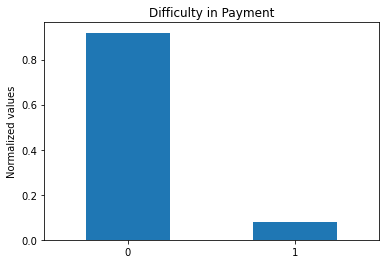

In [116]:
ad.TARGET.value_counts(normalize=True).plot.bar()
plt.title("Difficulty in Payment")
plt.xticks(rotation=0)
plt.ylabel("Normalized values")
plt.show()

--- Checking the ratio of 0 is to 1 

In [117]:
ad[ad.TARGET==0].shape[0]/ad[ad.TARGET==1].shape[0]

11.386666666666667

-- Distinguishing between the categorical variables and numerical(continuous) variable

In [118]:
categorical_column=list(ad.columns[ad.dtypes=="object"])
categorical_column

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [119]:
numerical_column=list(ad.columns[(ad.dtypes=='int32') | (ad.dtypes=='float64')])
numerical_column

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

AxesSubplot(0.125,0.125;0.775x0.755)


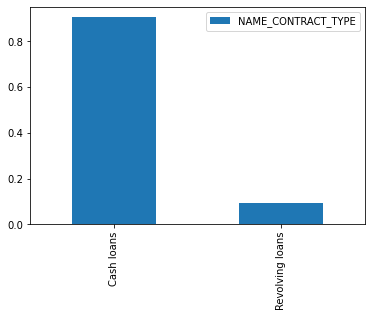

AxesSubplot(0.125,0.125;0.775x0.755)


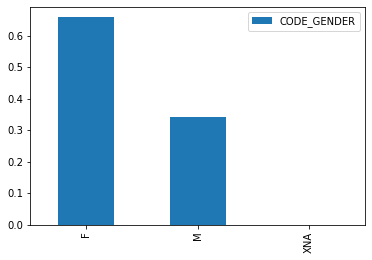

AxesSubplot(0.125,0.125;0.775x0.755)


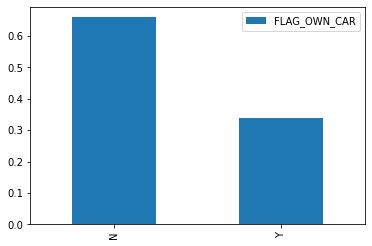

AxesSubplot(0.125,0.125;0.775x0.755)


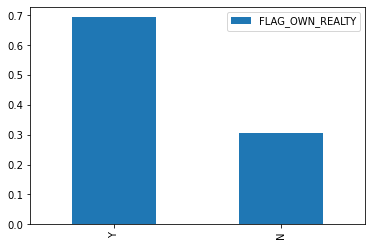

AxesSubplot(0.125,0.125;0.775x0.755)


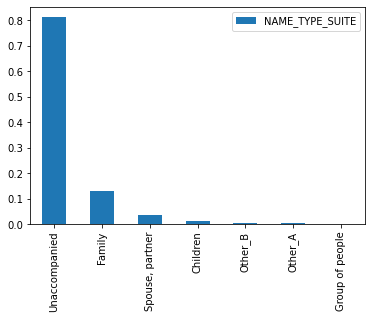

AxesSubplot(0.125,0.125;0.775x0.755)


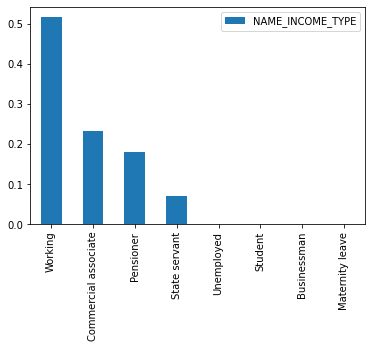

AxesSubplot(0.125,0.125;0.775x0.755)


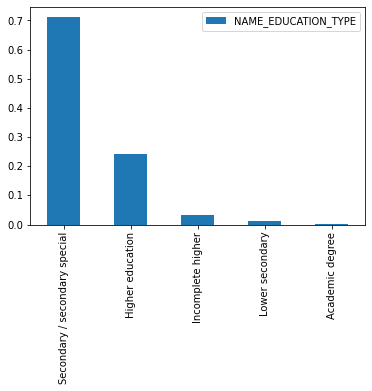

AxesSubplot(0.125,0.125;0.775x0.755)


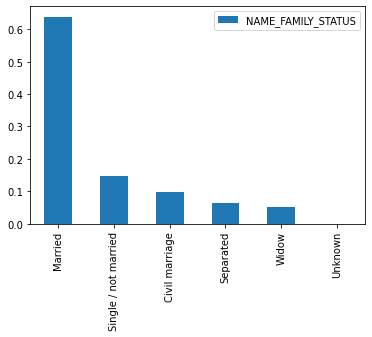

AxesSubplot(0.125,0.125;0.775x0.755)


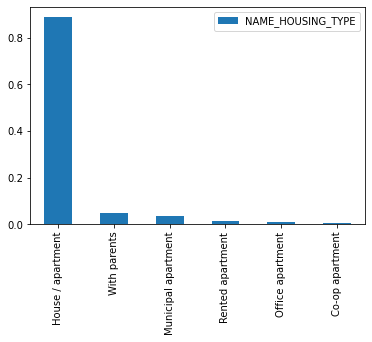

AxesSubplot(0.125,0.125;0.775x0.755)


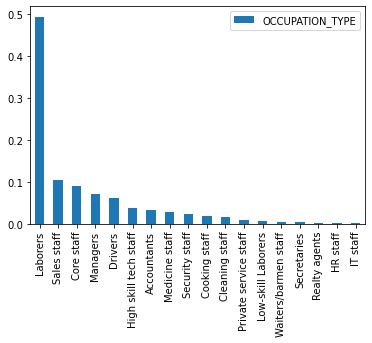

AxesSubplot(0.125,0.125;0.775x0.755)


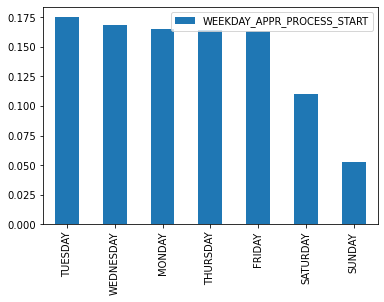

AxesSubplot(0.125,0.125;0.775x0.755)


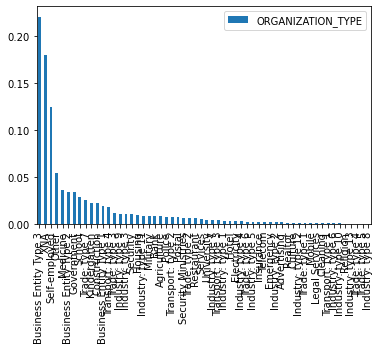

In [120]:
for i in ad.columns:
    if ad[i].dtypes=="object":
        print(ad[i].value_counts(normalize=True).plot.bar())
        plt.legend()
        plt.show()

In [121]:
ad.FLAG_OWN_CAR.value_counts(normalize=True)

N    0.659888
Y    0.340112
Name: FLAG_OWN_CAR, dtype: float64

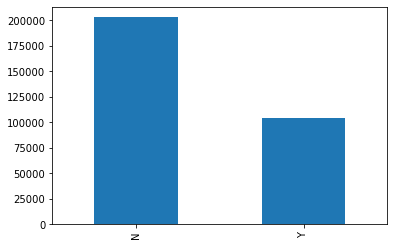

In [122]:
ad.FLAG_OWN_CAR.value_counts().plot.bar()
plt.show()

In [123]:
categorical_column

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

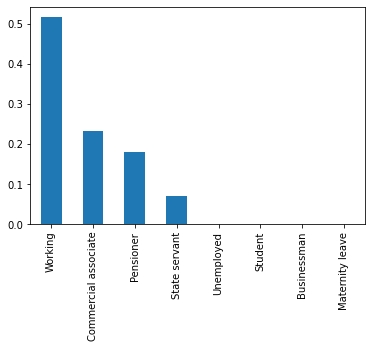

In [124]:
ad.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

# Bivariate and Multivariate analysis

In [125]:
numerical_column

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

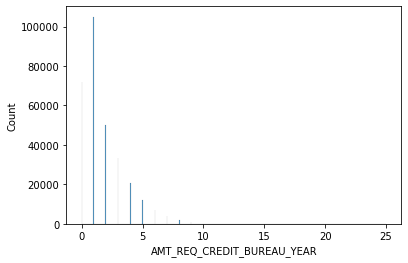

In [126]:
sns.histplot(ad['AMT_REQ_CREDIT_BUREAU_YEAR']) # Required credit visualize through years
plt.show() 

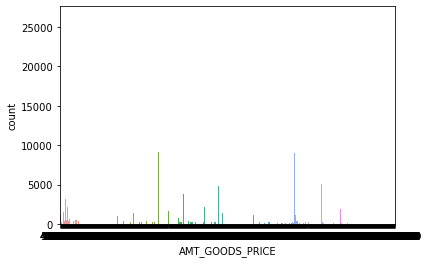

In [127]:
sns.countplot(ad['AMT_GOODS_PRICE'])
plt.show()

In [128]:
res=ad.groupby(['NAME_CONTRACT_TYPE'])['AMT_INCOME_TOTAL'].mean()
res

NAME_CONTRACT_TYPE
Cash loans         169068.767166
Revolving loans    166217.017656
Name: AMT_INCOME_TOTAL, dtype: float64

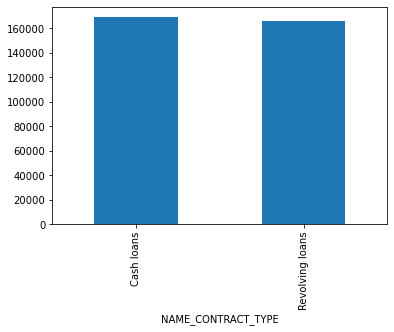

In [129]:
res.plot.bar()
plt.show()

In [130]:
ad.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].mean()

NAME_EDUCATION_TYPE
Academic degree                  240009.146341
Higher education                 208651.202339
Incomplete higher                181563.964578
Lower secondary                  130088.684666
Secondary / secondary special    155158.149443
Name: AMT_INCOME_TOTAL, dtype: float64

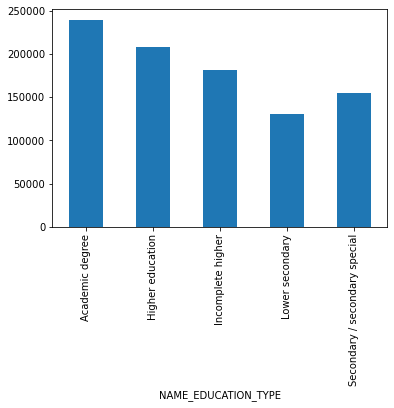

In [131]:
ad.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].mean().plot.bar()
plt.show()

In [132]:
categorical_column

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [133]:
numerical_column

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [134]:
pd.pivot_table(data=ad,columns=['NAME_EDUCATION_TYPE'],index='AMT_REQ_CREDIT_BUREAU_MON',values='AMT_INCOME_TOTAL',aggfunc='mean')

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
AMT_REQ_CREDIT_BUREAU_MON,,,,,
0.0,240696.850394,205604.030120,177504.312680,128770.455934,153262.914094
1.0,242653.846154,219113.816306,199001.595718,139749.130435,164451.515873
2.0,277500.000000,230690.950368,210804.668919,154920.731707,173250.842701
3.0,241875.000000,241682.365116,201281.019231,143653.846154,173810.539568
4.0,NaN,243957.235537,211632.352941,102600.000000,175920.082344
5.0,168750.000000,251504.639151,239175.000000,111375.000000,186576.923077
6.0,173250.000000,238336.016949,229821.428571,187500.000000,184164.116505
7.0,NaN,251406.089109,261321.428571,NaN,184008.909836
8.0,NaN,212051.886792,225750.000000,NaN,206887.500000


In [135]:
pd.pivot_table(data=ad,columns=['NAME_EDUCATION_TYPE'],index='REGION_POPULATION_RELATIVE',values='AMT_CREDIT',aggfunc='mean')

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
REGION_POPULATION_RELATIVE,,,,,
0.000290,NaN,585000.000000,NaN,NaN,225000.000000
0.000533,NaN,481108.153846,NaN,NaN,477701.480769
0.000938,NaN,756501.750000,454500.000000,NaN,518974.578947
0.001276,NaN,818705.972727,643903.054054,800240.400000,767479.011730
0.001333,NaN,626555.106383,580275.750000,493704.642857,544935.088757
0.001417,NaN,511825.500000,484640.437500,418706.250000,446999.670608
0.002042,8.086500e+05,543022.217128,564984.362903,459991.000000,495561.111895
0.002134,NaN,609556.567416,369959.565789,376728.500000,493589.900271
0.002506,NaN,828523.119910,647704.421053,712289.423077,689208.582589


These are the results got from the pivot tables 

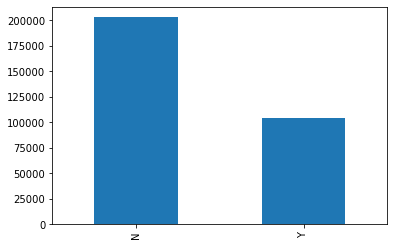

In [136]:
ad['FLAG_OWN_CAR'].value_counts().plot.bar()
plt.show()

In [137]:
ad['TARGET'].value_counts(normalize=True)

0    0.919268
1    0.080732
Name: TARGET, dtype: float64

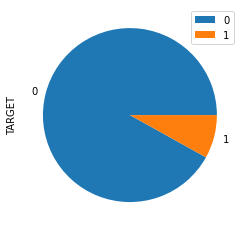

In [138]:
ad['TARGET'].value_counts(normalize=True).plot.pie()
plt.legend()
plt.show()

In [139]:
ad.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
ad[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
count,3.074990e+05,3.074990e+05,307499.000000
mean,1.687972e+05,5.990273e+05,27108.573909
std,2.371274e+05,4.024927e+05,14493.737315
min,2.565000e+04,4.500000e+04,1615.500000
25%,1.125000e+05,2.700000e+05,16524.000000
50%,1.469970e+05,5.135310e+05,24903.000000
75%,2.025000e+05,8.086500e+05,34596.000000
max,1.170000e+08,4.050000e+06,258025.500000


In [141]:
ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
ad_1=ad[ad['TARGET']==1]

In [143]:
ad_0=ad[ad['TARGET']==0]

In [144]:
ad_1['CODE_GENDER'].value_counts(normalize=True)

F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64

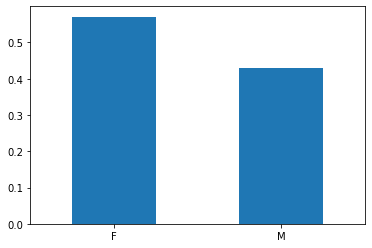

In [145]:
ad_1['CODE_GENDER'].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=0)
plt.show()

In [146]:
ad_0['CODE_GENDER'].value_counts(normalize=True)

F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64

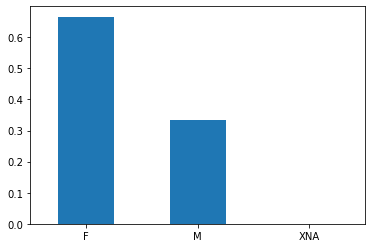

In [147]:
ad_0['CODE_GENDER'].value_counts(normalize=True).plot.bar()
plt.xticks(rotation=0)
plt.show()

In [148]:
ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


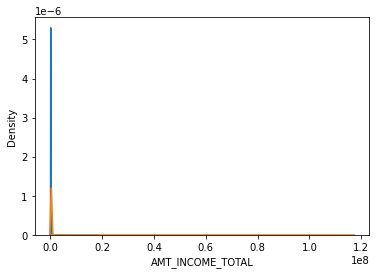

In [149]:
sns.distplot(ad_0['AMT_INCOME_TOTAL'],hist=False)
sns.distplot(ad_1['AMT_INCOME_TOTAL'],hist=False)
plt.show()

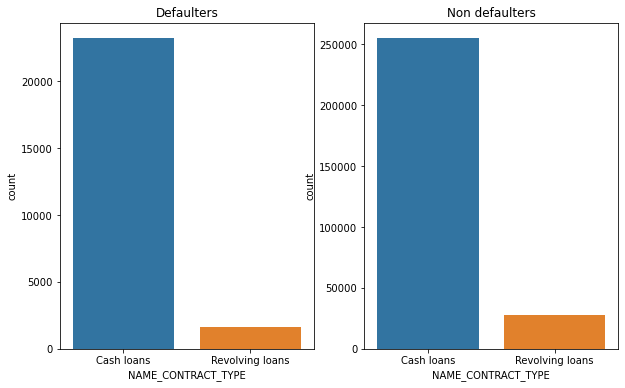

In [150]:
plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
plt.title('Defaulters')
sns.countplot(x='NAME_CONTRACT_TYPE',data=ad_1)

plt.subplot(1,2,2)
plt.title('Non defaulters')
sns.countplot(x='NAME_CONTRACT_TYPE',data=ad_0)

plt.show()

In [153]:
numerical_column

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [164]:
temp2=ad_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2','REGION_POPULATION_RELATIVE']].corr()
temp2

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_2,REGION_POPULATION_RELATIVE
AMT_INCOME_TOTAL,1.000000,0.038131,0.046421,0.037591,0.007068,0.009135
AMT_CREDIT,0.038131,1.000000,0.752195,0.982783,0.120028,0.069161
AMT_ANNUITY,0.046421,0.752195,1.000000,0.752295,0.115292,0.071690
AMT_GOODS_PRICE,0.037591,0.982783,0.752295,1.000000,0.130263,0.076053
EXT_SOURCE_2,0.007068,0.120028,0.115292,0.130263,1.000000,0.169839
REGION_POPULATION_RELATIVE,0.009135,0.069161,0.071690,0.076053,0.169839,1.000000


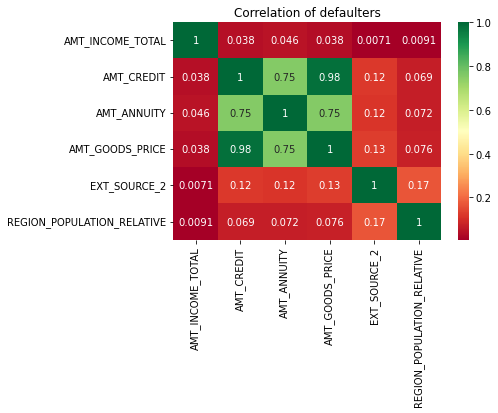

In [165]:
sns.heatmap(data=temp2,annot=True,cmap='RdYlGn')
plt.title("Correlation of defaulters")
plt.show()

In [166]:
temp3=ad_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2','REGION_POPULATION_RELATIVE']].corr()
temp3

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_2,REGION_POPULATION_RELATIVE
AMT_INCOME_TOTAL,1.000000,0.342793,0.418953,0.349421,0.139416,0.167832
AMT_CREDIT,0.342793,1.000000,0.771309,0.987022,0.128892,0.100589
AMT_ANNUITY,0.418953,0.771309,1.000000,0.776433,0.126363,0.120988
AMT_GOODS_PRICE,0.349421,0.987022,0.776433,1.000000,0.135382,0.103812
EXT_SOURCE_2,0.139416,0.128892,0.126363,0.135382,1.000000,0.198294
REGION_POPULATION_RELATIVE,0.167832,0.100589,0.120988,0.103812,0.198294,1.000000


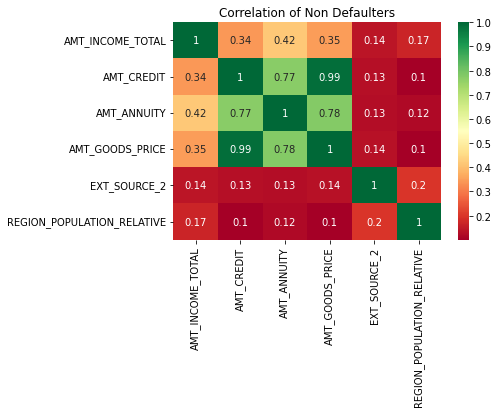

In [168]:
sns.heatmap(data=temp3,annot=True,cmap="RdYlGn")
plt.title("Correlation of Non Defaulters")
plt.show()

In [173]:
temp4=pd.crosstab(index=ad['CODE_GENDER'],columns=ad['NAME_EDUCATION_TYPE'])
temp4

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
CODE_GENDER,,,,,
F,100,50286,6283,2310,143461
M,64,24571,3992,1505,74923
XNA,0,1,1,0,2


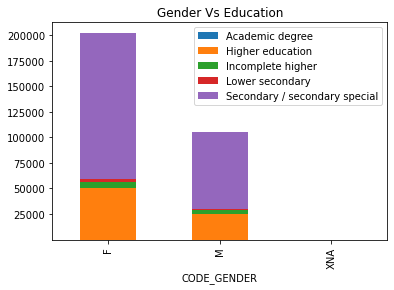

In [176]:
temp4.plot(kind='bar',stacked=True)
plt.title("Gender Vs Education")
plt.legend()
plt.show()

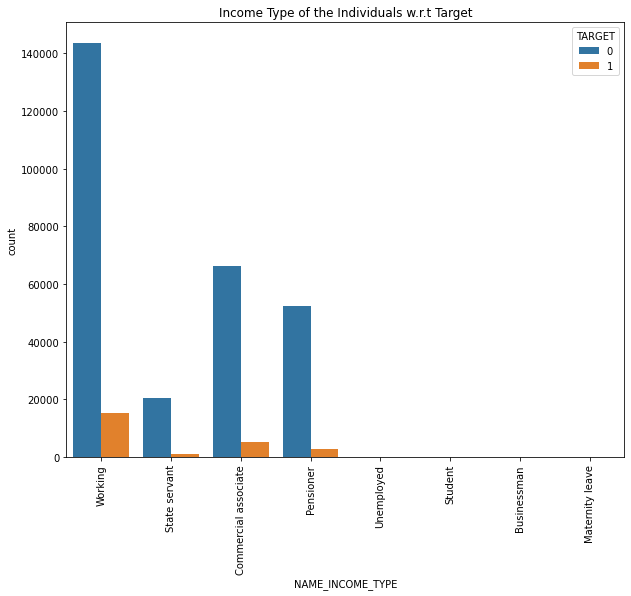

In [181]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'NAME_INCOME_TYPE',data=ad,hue = 'TARGET')
plt.title("Income Type of the Individuals w.r.t Target")
plt.xticks(rotation = 90)
plt.show()

-- Since DAYS_BIRTH is not in the correct format we need to change it

In [189]:
ad['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [190]:
ad['DAYS_BIRTH'] = ad['DAYS_BIRTH'].apply(lambda x: round(abs(x/365)))

In [191]:
ad['DAYS_BIRTH'].value_counts().head()

39    9023
38    8792
37    8727
40    8602
41    8494
Name: DAYS_BIRTH, dtype: int64

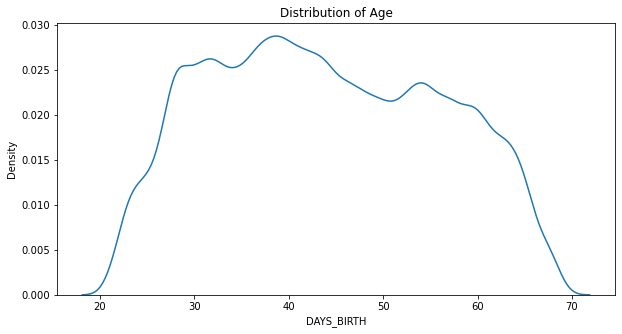

In [194]:
plt.figure(figsize=(10,5))
sns.distplot(ad['DAYS_BIRTH'],bins = 20,hist=False)
plt.title("Distribution of Age")
plt.show()

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>